In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, auc
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [117]:
# importar os dados sobre usuários
df = pd.read_csv('usuarios_data.csv')

## Dicionário de Variáveis

Esse arquivo csv possui 11 colunas. São elas:

<strong>-Nome:</strong> Nome do(a) Usuário(a) registrado no site.<br>
<strong>-Idade:</strong> Idade do(a) Usuário(a).<br>
<strong>-Email:</strong> Email de cadastro do(a) Usuário(a).<br>
<strong>-Gênero:</strong> Gênero declarado pelo(a) Usuário(a).<br>
    <li>Masculino - M</li>
    <li>Feminino - F</li>
<strong>-Cep:</strong> Cep da residência do(a) Usuário(a).<br>
<strong>-Cidade/Estado:</strong> Cidade/Estado da residência do(a) Usuário(a).<br>
<strong>-Bairro:</strong> Bairro da residência do(a) Usuário(a).<br>
<strong>-Usuário(a) ativo(a):</strong> Situação de atividade do(a) Usuário(a).<br>
    <li>0 para Avito - Usuário efetuou compra na última semana.</li>
    <li>1 para Inativo - Usuário não efetuou compra na última semana.</li>
<strong>-Produto:</strong> Produto comprado.<br>
<strong>-Valor:</strong> Valor do produto.<br>
<strong>-Data:</strong> Data da compra.<br>

## Análise Exploratória dos Dados

In [118]:
df.sample(5)

,nome,idade,email,genero,cep,cidade_estado,bairro,user_ativo,produto,produto_valor,data_compra
805677,Keith Mckenzie,42,anafreisa.teste@gmail.com,M,6460971,Barueri/SP,Tamboré,0,Vinho Tinto,69.9,2021-03-20
473016,Gregory Moore,44,anafreisa.teste@gmail.com,M,85912180,Toledo/PR,Jardim Panorama,1,Cerveja,4.0,2021-03-26
500898,Lori Hinton,50,anafreisa.teste@gmail.com,M,17604080,Tupã/SP,Centro,1,Cerveja,4.0,2021-03-26
34236,Diana Gonzalez,31,anafreisa.teste@gmail.com,F,2074030,São Paulo/SP,Vila Paiva,1,Vodka,33.8,2021-03-27
550078,Jorge Townsend,54,anafreisa.teste@gmail.com,F,6270300,Osasco/SP,Vila Menck,1,Vinho Branco,56.9,2021-03-27


In [119]:
df.shape

(1000000, 11)

Base de dados com 1 milhão de entradas com informações sobre cada compra efetuada no site.

In [120]:
df.isnull().sum()

nome                 0
idade                0
email                0
genero               0
cep                  0
cidade_estado        0
bairro           15150
user_ativo           0
produto              0
produto_valor        0
data_compra          0
dtype: int64

In [121]:
bairro_isnull = df.bairro.isnull().sum()
bairro_count = df.bairro.count()
percent_bairro_null = ((100 * bairro_isnull) / bairro_count).round(2)
print(f'Percentual de Bairros sem informação: {percent_bairro_null}%')

Percentual de Bairros sem informação: 1.54%


Como este número é muito pequeno, não invalida o uso dessa variável.

<AxesSubplot:>

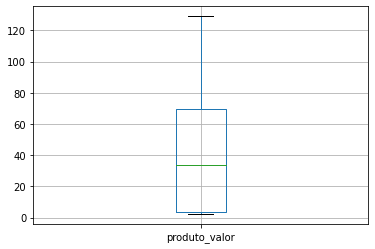

In [122]:
df.boxplot(column=['produto_valor'])

Nenhum dado de valor de produto fora do esperado.

In [123]:
df[df.nome.duplicated()]

,nome,idade,email,genero,cep,cidade_estado,bairro,user_ativo,produto,produto_valor,data_compra
345,Michael Barton,23,anafreisa.teste@gmail.com,M,25725510,Petrópolis/RJ,Fazenda Inglesa,1,Tequila,95.99,2021-03-23
417,James Smith,50,anafreisa.teste@gmail.com,F,54518475,Cabo de Santo Agostinho/PE,Garapu,0,Cerveja,4.00,2021-03-03
424,James Martinez,55,anafreisa.teste@gmail.com,F,11609515,São Sebastião/SP,Industrial,0,Refrigerante Cola,3.50,2021-03-22
491,Nicole Lee,28,anafreisa.teste@gmail.com,M,25926780,Magé/RJ,Jardim da Paz (Guia de Pacobaíba),1,Cerveja,4.00,2021-03-24
541,William Jones,27,anafreisa.teste@gmail.com,F,83707080,Araucária/PR,Thomaz Coelho,0,Cerveja,4.00,2021-03-17
...,...,...,...,...,...,...,...,...,...,...,...
999993,Kimberly Hill,51,anafreisa.teste@gmail.com,M,78080065,Cuiabá/MT,Chácara dos Pinheiros,0,Tequila,95.99,2021-03-07
999994,Richard Elliott,29,anafreisa.teste@gmail.com,M,49071130,Aracaju/SE,Cidade Nova,0,Refrigerante Cola,3.50,2021-03-06
999997,Melissa Serrano,28,anafreisa.teste@gmail.com,M,13013101,Campinas/SP,Centro,1,Água,2.29,2021-03-24
999998,Kelly Harvey,26,anafreisa.teste@gmail.com,M,74370463,Goiânia/GO,Residencial Aquários,1,Vinho Branco,56.90,2021-03-25


In [124]:
df[(df.nome=='Danielle Scott') & (df.produto=='Tequila') & (df.cidade_estado=='Jaboatão dos Guararapes/PE')]

,nome,idade,email,genero,cep,cidade_estado,bairro,user_ativo,produto,produto_valor,data_compra


In [125]:
df[(df.nome=='Christopher Johnson') & (df.produto=='whisky') & (df.cidade_estado=='Porto Alegre/RS')]

,nome,idade,email,genero,cep,cidade_estado,bairro,user_ativo,produto,produto_valor,data_compra


As entradas com nome duplicadas referem se a diferentes compras do usuário ou homônimos.

# Análise de Vendas e Receitas

## Produtos que mais vendem

In [126]:
graf_dados = df.groupby('produto').count().produto_valor.sort_values(ascending=False)
graf_dados

produto
Cerveja                 160287
Vinho Tinto             157665
Refrigerante Guaraná    136103
Vinho Branco            129470
Refrigerante Cola       103334
whisky                  100438
Tequila                  72133
Vodka                    62218
Água                     43053
Gelo                     21018
Água com gás             14281
Name: produto_valor, dtype: int64

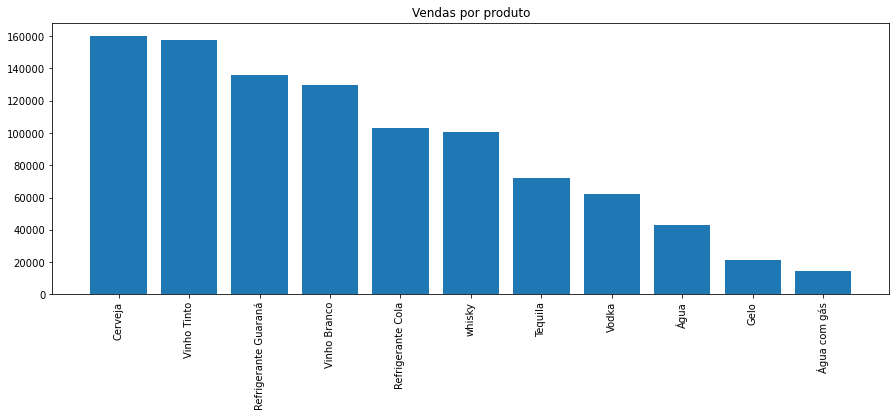

In [127]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=90)
plt.title('Vendas por produto')
plt.show()

## Receita por Produto

In [128]:
graf_dados = df[['produto','produto_valor']].groupby('produto').sum().produto_valor.sort_values(ascending=False)
graf_dados

produto
whisky                  1.295650e+07
Vinho Tinto             1.102078e+07
Vinho Branco            7.366843e+06
Tequila                 6.924047e+06
Vodka                   2.102968e+06
Cerveja                 6.411480e+05
Refrigerante Cola       3.616690e+05
Refrigerante Guaraná    3.130369e+05
Gelo                    2.143836e+05
Água                    9.859137e+04
Água com gás            4.698449e+04
Name: produto_valor, dtype: float64

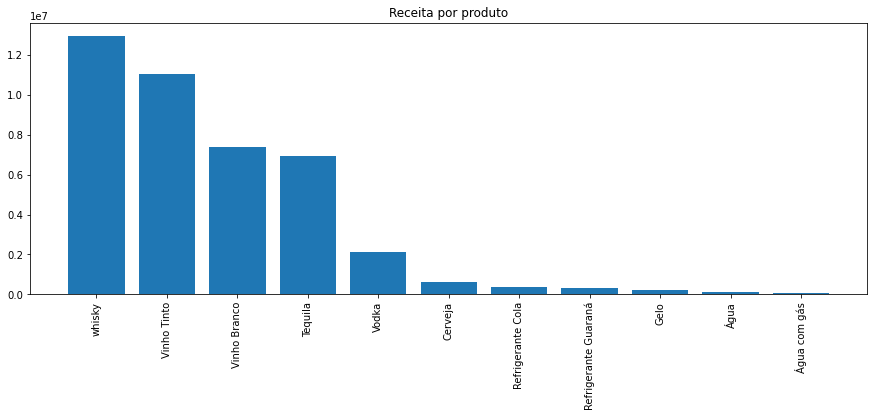

In [129]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.xticks(rotation=90)
plt.title('Receita por produto')
plt.show()

## Prevendo a inatividade

In [242]:
chunk_list = []
batch_no = 1
df_chunk = pd.read_csv('usuarios_data.csv', chunksize=15000)

for chunk in df_chunk:
    chunk.to_csv('usuarios_data' + str(batch_no) + '.csv', index=False)
    batch_no +=1

In [243]:
df_chunked = pd.read_csv('usuarios_data1.csv')

### Alvo

In [244]:
#dfML = df_chunked[['genero', 'produto','produto_valor','idade','user_ativo']]
dfML = df_chunked[['genero', 'idade', 'user_ativo']]
dfML = dfML.replace([' ', '-', '/'], '_', regex=True)
dfML

,genero,idade,user_ativo
0,M,31,1
1,M,59,1
2,F,37,0
3,F,64,0
4,M,42,0
...,...,...,...
14995,F,52,1
14996,F,49,0
14997,M,54,0
14998,M,41,1


### Normalização

In [245]:
dfML['idade'] = dfML['idade']/dfML['idade'].max()
dfML

,genero,idade,user_ativo
0,M,0.392405,1
1,M,0.746835,1
2,F,0.468354,0
3,F,0.810127,0
4,M,0.531646,0
...,...,...,...
14995,F,0.658228,1
14996,F,0.620253,0
14997,M,0.683544,0
14998,M,0.518987,1


### Dados Categóricos

In [246]:
#col_cat = ['genero', 'produto']
col_cat = ['genero']
dfML_dummies = pd.get_dummies(dfML[col_cat].astype(str), drop_first=False)
dfML_dummies

,genero_F,genero_M
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
14995,1,0
14996,1,0
14997,0,1
14998,0,1


In [247]:
dfML = pd.concat([dfML, dfML_dummies], axis=1) 
dfML = dfML.drop(col_cat, axis=1)
dfML

,idade,user_ativo,genero_F,genero_M
0,0.392405,1,0,1
1,0.746835,1,0,1
2,0.468354,0,1,0
3,0.810127,0,1,0
4,0.531646,0,0,1
...,...,...,...,...
14995,0.658228,1,1,0
14996,0.620253,0,1,0
14997,0.683544,0,0,1
14998,0.518987,1,0,1


## Dados de treinamento e de teste

In [248]:
y = dfML.user_ativo
X = dfML.drop(['user_ativo'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_new = X.loc[[1,2]]
X_new

,idade,genero_F,genero_M
1,0.746835,0,1
2,0.468354,1,0


## Regressão Logística

In [249]:
all_col_with_plus = ' + '.join(dfML.drop(['user_ativo'], axis=1).columns)
modelo = smf.glm(formula='user_ativo ~ ' + all_col_with_plus, data=dfML,
                family = sm.families.Binomial()).fit()
print(modelo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             user_ativo   No. Observations:                15000
Model:                            GLM   Df Residuals:                    14997
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8638.8
Date:                Thu, 01 Apr 2021   Deviance:                       17278.
Time:                        22:04:08   Pearson chi2:                 1.49e+04
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.858e+12   5.36e+12     -1.654      0.0

In [250]:
model = LogisticRegression(penalty='none', solver='newton-cg')
model.fit(X_train, y_train)

print('- Matriz de Confusão')
print(confusion_matrix(y_test, model.predict(X_test)))
print('\n- Reporte completo')
print(classification_report(y, model.predict(X), zero_division=1))
print('\n- Reporte teste')
print(classification_report(y_test, model.predict(X_test)))

- Matriz de Confusão
[[3352    0]
 [1148    0]]

- Reporte completo
              precision    recall  f1-score   support

           0       0.74      1.00      0.85     11063
           1       1.00      0.00      0.00      3937

    accuracy                           0.74     15000
   macro avg       0.87      0.50      0.42     15000
weighted avg       0.81      0.74      0.63     15000


- Reporte teste
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      3352
           1       0.00      0.00      0.00      1148

    accuracy                           0.74      4500
   macro avg       0.37      0.50      0.43      4500
weighted avg       0.55      0.74      0.64      4500



C:\Users\anafr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [251]:
model.predict(X_new)

array([0, 0], dtype=int64)

In [252]:
reg_log = LogisticRegression().fit(X_train, y_train)
print(reg_log.score(X,y))

0.7375333333333334
